In [1]:
#导入相关的库
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 图像阈值

In [4]:
img = cv2.imread("game.jpg")

In [5]:
img

array([[[ 85,  45,  33],
        [ 87,  45,  33],
        [ 87,  45,  33],
        ...,
        [ 96,  49,  51],
        [ 93,  48,  51],
        [ 93,  50,  53]],

       [[ 87,  45,  32],
        [ 87,  45,  32],
        [ 90,  47,  32],
        ...,
        [ 90,  43,  45],
        [ 86,  41,  44],
        [ 84,  41,  44]],

       [[ 88,  48,  29],
        [ 90,  48,  29],
        [ 90,  48,  29],
        ...,
        [ 93,  46,  48],
        [ 89,  44,  47],
        [ 85,  42,  45]],

       ...,

       [[119,  67,  50],
        [119,  69,  51],
        [114,  65,  49],
        ...,
        [ 17,  13,   8],
        [ 17,  13,   8],
        [ 17,  13,   8]],

       [[118,  66,  49],
        [113,  61,  44],
        [104,  53,  37],
        ...,
        [ 17,  13,   8],
        [ 17,  13,   8],
        [ 17,  13,   8]],

       [[117,  63,  46],
        [104,  52,  35],
        [ 91,  40,  24],
        ...,
        [ 17,  13,   8],
        [ 17,  13,   8],
        [ 17,  13,   8]]

In [6]:
#定义一个图像显示函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
cv_show("game",img)

In [8]:
img.shape

(512, 350, 3)

In [9]:
b,g,r = cv2.split(img)

In [10]:
cv_show("b",b)

In [11]:
b.shape     #目前以为单通道的灰度值

(512, 350)

<function matplotlib.pyplot.show(*args, **kw)>

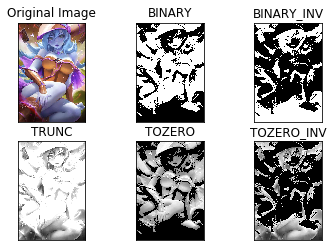

In [17]:
ret,thresh1 = cv2.threshold(b,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(b,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(b,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(b,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(b,127,255,cv2.THRESH_TOZERO_INV)

titles = ["Original Image","BINARY","BINARY_INV","TRUNC","TOZERO","TOZERO_INV"]
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],"gray")
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])      #不显示像素的坐标值
plt.show

# 图像平滑（本质：滤波处理）

In [19]:
girl = cv2.imread("girl.png")
cv_show("girl",girl)

In [21]:
#均值滤波
#简单的平均卷积操作（必须对卷积有所了解，可以上知乎查找）
blur = cv2.blur(girl,(3,3))     #卷积的内核为3*3，通常是使用奇数

cv_show("blur",blur)
#与原照片相比，个人感觉就是被虚化了，就是没有原照片的清晰了。

In [22]:
#方框滤波
#基本和均值一样，可以选择归一化（-1：表示通道是一致的）
box = cv2.boxFilter(girl,-1,(3,3),normalize = True)

cv_show("box",box)
#个人觉得与均值也差不了多少

In [24]:
#方框滤波
#基本和均值一样，可以选择归一化（-1），容易越界（像素值容易大于255），发生越界就把该点像素值设置为255
box = cv2.boxFilter(girl,-1,(3,3),normalize = False)    #normalize是选择是否作归一化

cv_show("box",box)
#这个越界的太明显了，不建议使用。

In [25]:
#高斯滤波
#高斯滤波的卷积核里的数值是满足高斯分布（即：正太分布）相当于更重视中间的(即：离得越近的作用越大，离得远的作用越小)
aussian = cv2.GaussianBlur(girl,(5,5),1)

cv_show("aussian",aussian)

In [26]:
#中值滤波
#相当于用均值代替（核内数值的中位数）
median = cv2.medianBlur(girl,5)

cv_show("median",median)

In [28]:
#展示所有的
res = np.hstack((blur,aussian,median))
print(res)

cv_show("res",res)
#由于图片太大了，展示不了

[[[ 11  36  46]
  [ 12  37  47]
  [ 12  37  47]
  ...
  [183 223 235]
  [183 223 235]
  [183 223 235]]

 [[ 11  35  46]
  [ 13  37  47]
  [ 13  37  47]
  ...
  [183 223 235]
  [183 223 235]
  [183 223 235]]

 [[ 13  36  46]
  [ 13  36  46]
  [ 12  35  46]
  ...
  [184 223 235]
  [183 223 235]
  [183 223 235]]

 ...

 [[168 184 191]
  [168 184 191]
  [168 184 191]
  ...
  [237 242 243]
  [237 242 243]
  [237 242 243]]

 [[168 184 191]
  [168 184 191]
  [168 184 191]
  ...
  [237 242 243]
  [237 242 243]
  [237 242 243]]

 [[168 184 191]
  [168 184 191]
  [168 184 191]
  ...
  [237 242 243]
  [237 242 243]
  [237 242 243]]]


# 总结